In [ ]:
from numpy import power, sin, cos, linspace, pi
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
pd.set_option("display.precision", 3)

In [ ]:
def graph_maker(point=None, a=None, b=None):
  A = -10
  B = 10
  numbers = linspace(A, B, 10000)
  fig, ax = plt.subplots(figsize = (10, 5))
  if point is not None:
    ax.scatter(point, function(point))
    ax.axvline(x=a, color='black', linestyle='--')
    ax.axvline(x=b, color='black', linestyle='--')
  ax.plot(numbers, function(numbers))
  ax.set_xlabel("x")
  ax.set_ylabel("f(x)")
  ax.set_title("Plot of the function")
  ax.grid(True)
  plt.show()

In [ ]:
#define the function of interest
def function(x):
    return power(x, 3) * cos(x) * sin(x) + 3 * power(x, 2) * sin(x) - 3 * x

$$
{x \text{_current}}: X^k
$$

$$
{x \text{_previous}} = X^{(k-1)}
$$

$$
{x\text{_next}} = X^{(k+1)}
$$

In [ ]:
def linear_convergance(x_previous, x_current, x_next, order=1):
  return abs((x_next - x_current)) / power(abs(x_current - x_previous), order)

In [ ]:
from math import log
def digit_agreement(x_previous, x_current, x_next):
  return -log(abs(x_next - x_current)) + log(abs(x_current - x_previous))

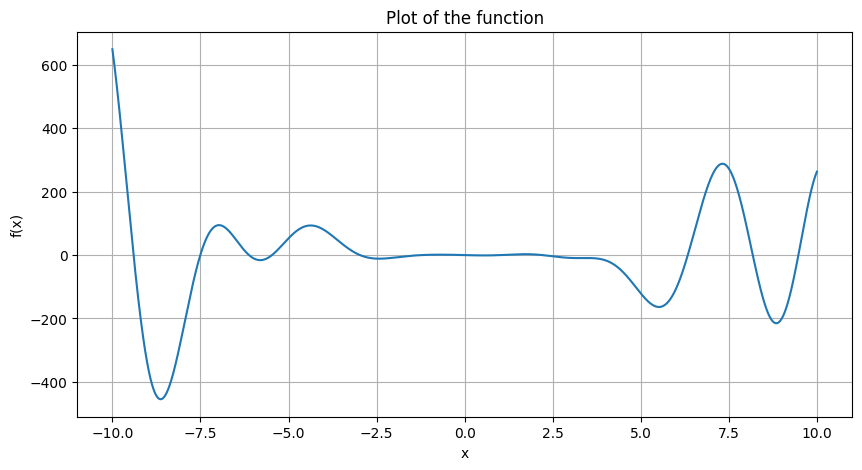

In [ ]:
graph_maker()

In [ ]:
def golden_search(a, b, eps):

  # define golden ratio
  gr = (1+ math.sqrt(5)) / 2

  # variable initilization, c and d are linear convergance and digit agreement respectively
  c, d = None, None
  # Initializing the # of iterations
  iteration = 0
  # Initializing parameters
  x = b - ((b - a) / gr)
  y = a + ((b - a) / gr)
  x_previous = None
  x_next = None


  # creating a dataframe so that we can keep track of the variables
  df = pd.DataFrame(columns=["iteration", "a", "b", "x", "y", "f(x)", "f(y)", "convergance_rate", "digit_agreement"])
  # starting the track
  df.loc[iteration] = [iteration, a, b, None, None, None, None, None, None]


  # actual algorithm
  # the while block will stop if the difference between a and b is smaller than epsilon
  while abs(b - a) >= eps:

    x_current = x

    # narrowing down the interval by removing the part closer to the bigger value
    if function(y) < function(x):
      a = x
      x = y
      y = a + ((b - a) / gr)
    else:
      b = y
      y = x
      x = b - ((b - a) /gr)

    # parameter assigning for next iteration
    x_next = x

    if (x_previous is not None) and (x_next is not None):
      d = digit_agreement(x_previous, x_current, x_next)
      c = linear_convergance(x_previous, x_current, x_next)
    else:
      d = None
      c = None

    # variable assigning for next iteration
    x_previous = x_current
    # update the number of iterations
    iteration += 1
    # updating the dataframe
    df.loc[iteration] = [iteration, a, b, x, y, function(x), function(y), c, d]
    df["iteration"] = df["iteration"].astype(int)

  return df.set_index("iteration"), x_current

In [ ]:
def pipeline(a, b, eps):
  df, point = golden_search(a, b, eps)
  graph_maker(point, a, b)
  return df

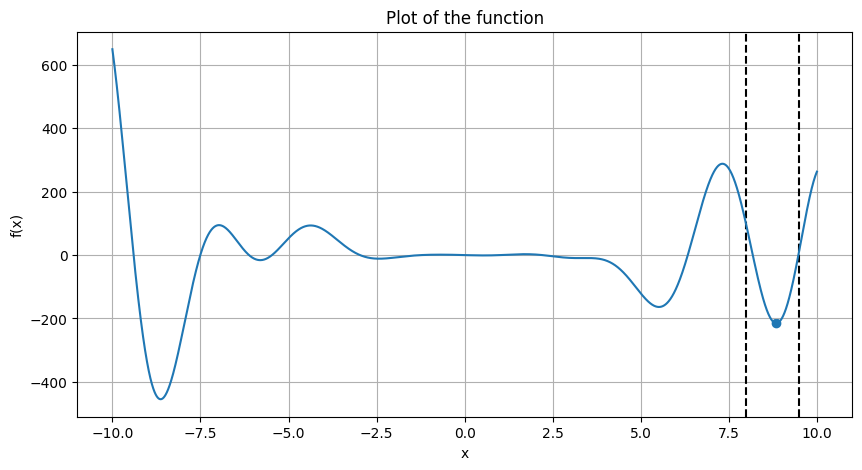

,a,b,x,y,f(x),f(y),convergance_rate,digit_agreement
iteration,,,,,,,,
0,8.000,9.500,NaN,NaN,NaN,NaN,NaN,NaN
1,8.573,9.500,8.927,9.146,-211.080,-160.819,NaN,NaN
2,8.573,9.146,8.792,8.927,-213.321,-211.080,0.382,0.962
3,8.573,8.927,8.708,8.792,-203.763,-213.321,0.618,0.481
4,8.708,8.927,8.792,8.843,-213.321,-215.096,1.000,0.000
5,8.792,8.927,8.843,8.875,-215.096,-214.573,0.618,0.481
6,8.792,8.875,8.824,8.843,-214.798,-215.096,0.382,0.962


In [ ]:
pipeline(8, 9.5, 1e-1)

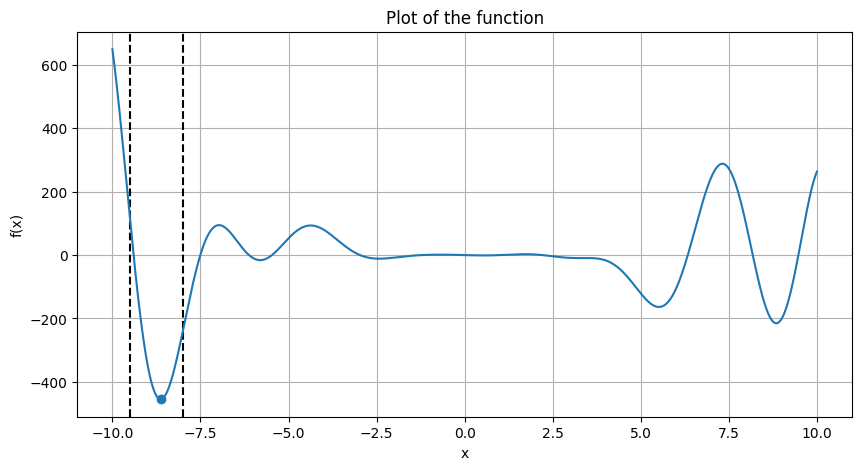

,a,b,x,y,f(x),f(y),convergance_rate,digit_agreement
iteration,,,,,,,,
0,-9.500,-8.000,NaN,NaN,NaN,NaN,NaN,NaN
1,-8.927,-8.000,-8.573,-8.354,-452.454,-404.012,NaN,NaN
2,-8.927,-8.354,-8.708,-8.573,-450.358,-452.454,0.382,0.962
3,-8.708,-8.354,-8.573,-8.489,-452.454,-440.790,1.000,0.000
4,-8.708,-8.489,-8.625,-8.573,-454.858,-452.454,0.382,0.962
5,-8.708,-8.573,-8.657,-8.625,-454.393,-454.858,0.618,0.481
6,-8.657,-8.573,-8.625,-8.605,-454.858,-454.392,1.000,0.000
7,-8.657,-8.605,-8.637,-8.625,-454.859,-454.858,0.382,0.962
8,-8.657,-8.625,-8.644,-8.637,-454.750,-454.859,0.618,0.481


In [ ]:
pipeline(-9.5, -8, 1e-2)

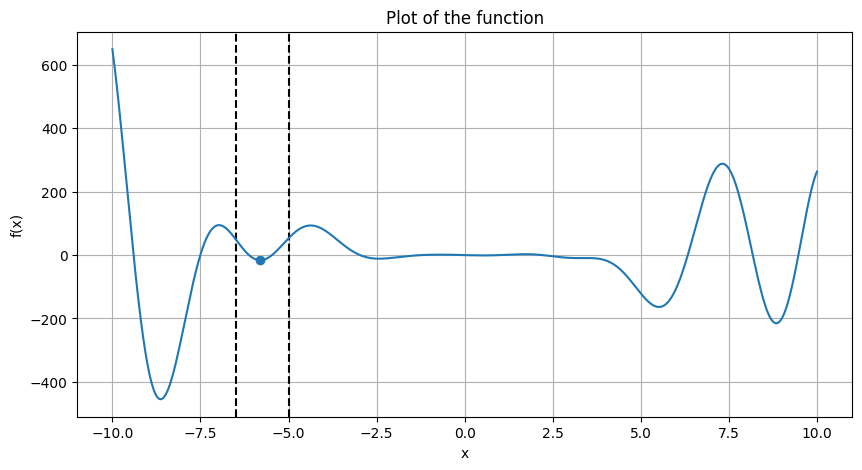

,a,b,x,y,f(x),f(y),convergance_rate,digit_agreement
iteration,,,,,,,,
0,-6.500,-5.000,NaN,NaN,NaN,NaN,NaN,NaN
1,-6.500,-5.573,-6.146,-5.927,2.474,-13.515,NaN,NaN
2,-6.146,-5.573,-5.927,-5.792,-13.515,-15.967,1.000,0.000
3,-5.927,-5.573,-5.792,-5.708,-15.967,-14.599,0.618,0.481
4,-5.927,-5.708,-5.843,-5.792,-15.721,-15.967,0.382,0.962
5,-5.843,-5.708,-5.792,-5.760,-15.967,-15.698,1.000,0.000
6,-5.843,-5.760,-5.812,-5.792,-15.973,-15.967,0.382,0.962
7,-5.843,-5.792,-5.824,-5.812,-15.915,-15.973,0.618,0.481
8,-5.824,-5.792,-5.812,-5.804,-15.973,-15.985,1.000,0.000


In [ ]:
pipeline(-6.5, -5, 1e-3)

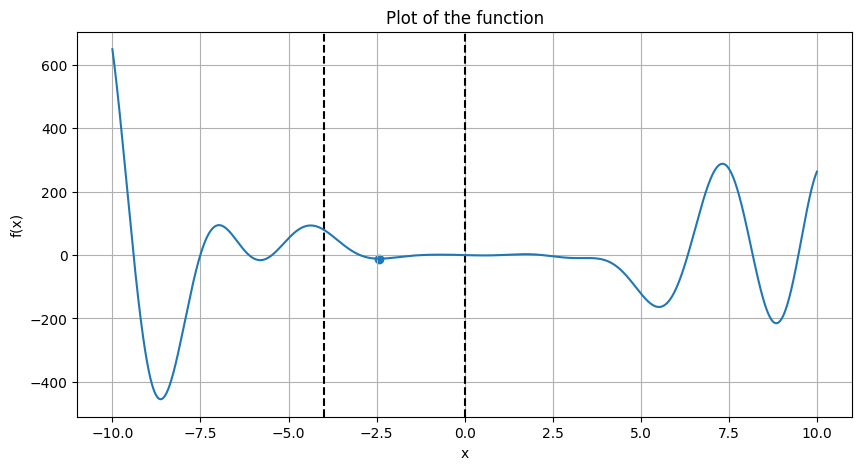

,a,b,x,y,f(x),f(y),convergance_rate,digit_agreement
iteration,,,,,,,,
0,-4.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN
1,-4.000,-1.528,-3.056,-2.472,4.327,-11.313,NaN,NaN
2,-3.056,-1.528,-2.472,-2.111,-11.313,-9.287,1.000,0.000
3,-3.056,-2.111,-2.695,-2.472,-8.949,-11.313,0.382,0.962
4,-2.695,-2.111,-2.472,-2.334,-11.313,-11.160,1.000,0.000
5,-2.695,-2.334,-2.557,-2.472,-10.845,-11.313,0.382,0.962
6,-2.557,-2.334,-2.472,-2.420,-11.313,-11.374,1.000,0.000
7,-2.472,-2.334,-2.420,-2.387,-11.374,-11.335,0.618,0.481
8,-2.472,-2.387,-2.440,-2.420,-11.370,-11.374,0.382,0.962


In [ ]:
pipeline(-4, 0, 1e-4)